In [1]:
import scipy.stats
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from CharacterFeatureExtractor import featureExtractor
from DrawCharacter import DrawCharacter
from createDataSet import createDataSet
from PattRecClasses import HMM_TA 
from featurevisual import featurevisual

# Test feature extractor

In [2]:
createDataSet(act=False, name="featTest")

/home/jonas/Local/Pattern-Recognition-Project
Diff detected at  5 ! Diff  1  is: 0.8156919233162234
Diff detected at  5 ! Diff  2  is: 0.17219081452293916
Diff detected at  5 ! Diff  3  is: 0.0
Diff detected at  5 ! Diff  4  is: 0.0
Diff detected at  5 ! Diff  5  is: 0.0
Diff detected at  5 ! Diff  6  is: 0.14189705460416402
Diff detected at  5 ! Diff  7  is: 0.6777082925646276
Diff detected at  13 ! Diff  1  is: 0.12676753510136196
Diff detected at  13 ! Diff  2  is: 0.0454232794215772
Diff detected at  13 ! Diff  3  is: 0.09495170634275629
Diff detected at  13 ! Diff  4  is: 0.19982864507299025
Diff detected at  13 ! Diff  5  is: 0.1603754439759506
Diff detected at  13 ! Diff  6  is: 0.1603754439759506
Diff detected at  13 ! Diff  7  is: 0.0673138757927052
Diff detected at  5 ! Diff  1  is: 0.09065988720074514
Diff detected at  5 ! Diff  2  is: 0.07448879021388166
Diff detected at  5 ! Diff  3  is: 0.08837678614484867
Diff detected at  5 ! Diff  4  is: 0.06512516333438578
Diff detect

Diff detected at  20 ! Diff  7  is: 0.18534794999569476
Diff detected at  1 ! Diff  1  is: 0.04758310327698334
Diff detected at  1 ! Diff  2  is: 0.025204745326941724
Diff detected at  1 ! Diff  3  is: 0.19178814198670513
Diff detected at  1 ! Diff  4  is: 0.01098856868273379
Diff detected at  1 ! Diff  5  is: 0.10801172470004627
Diff detected at  1 ! Diff  6  is: 0.10801172470004627
Diff detected at  1 ! Diff  7  is: 2.6095162255280933
Remove outlier at index 1  to  8
[ 1.57079633 -1.35212738 -1.30454428 -1.27933953 -1.47112767 -1.46013911
 -1.35212738]
-1.460139105621001 [-1.46013911 -1.46013911 -1.46013911 -1.46013911 -1.46013911 -1.46013911
 -1.46013911]
Diff detected at  8 ! Diff  1  is: 0.08567929750453263
Diff detected at  8 ! Diff  2  is: 0.051500810951225606
Diff detected at  8 ! Diff  3  is: 0.09495170634275629
Diff detected at  8 ! Diff  4  is: 0.19739555984988066
Diff detected at  8 ! Diff  5  is: 0.20112688581653948
Diff detected at  8 ! Diff  6  is: 0.013887995930967012
D

Diff detected at  2 ! Diff  1  is: 0.10801172470004627
Diff detected at  2 ! Diff  2  is: 2.922923707715851
Remove outlier at index 2  to  4
[ 1.57079633 -1.46013911]
-1.3521273809209546 [-1.35212738 -1.35212738]
Diff detected at  2 ! Diff  3  is: 0.11065722117389565
Diff detected at  2 ! Diff  4  is: 3.0046257151629754
Remove outlier at index 2  to  6
[-1.35212738 -1.35212738 -1.35212738  1.57079633]
1.460139105621001 [1.46013911 1.46013911 1.46013911 1.46013911]
Diff detected at  2 ! Diff  5  is: 1.7631555554159164
Remove outlier at index 2  to  7
[1.46013911 1.46013911 1.46013911 1.46013911 1.46013911]
-1.5444866095419745 [-1.54448661 -1.54448661 -1.54448661 -1.54448661 -1.54448661]
Diff detected at  2 ! Diff  6  is: 0.10801172470004632
Diff detected at  2 ! Diff  7  is: 0.35563588430075976
Diff detected at  4 ! Diff  1  is: 0.11065722117389565
Diff detected at  4 ! Diff  2  is: 3.0046257151629754
Remove outlier at index 4  to  6
[-1.54448661 -1.54448661]
-1.5444866095419745 [-1.544

Diff detected at  6 ! Diff  1  is: 0.8369563351769013
Diff detected at  6 ! Diff  2  is: 0.24281883927145786
Diff detected at  6 ! Diff  3  is: 0.017542060057402553
Diff detected at  6 ! Diff  4  is: 0.13640260440094742
Diff detected at  6 ! Diff  5  is: 0.20152776773533332
Diff detected at  6 ! Diff  6  is: 0.0651251633343859
Diff detected at  6 ! Diff  7  is: 0.12435499454676147
Diff detected at  17 ! Diff  1  is: 0.09966865249116208
Diff detected at  17 ! Diff  2  is: 0.14311954788269288
Diff detected at  17 ! Diff  3  is: 0.0434508953915308
Diff detected at  17 ! Diff  4  is: 0.07677189126977801
Diff detected at  17 ! Diff  5  is: 0.25144409027801773
Diff detected at  17 ! Diff  6  is: 0.19250163480997962
Diff detected at  17 ! Diff  7  is: 0.2904019425484412
Diff detected at  4 ! Diff  1  is: 0.7853981633974483
Diff detected at  4 ! Diff  2  is: 0.09495170634275635
Diff detected at  4 ! Diff  3  is: 0.08490179344972193
Diff detected at  4 ! Diff  4  is: 0.08314123188844125
Diff de

[-1.418147 -1.418147 -1.418147]
-1.4181469983996315 [-1.418147 -1.418147 -1.418147]
Diff detected at  22 ! Diff  4  is: 0.0
Diff detected at  22 ! Diff  5  is: 0.0
Diff detected at  22 ! Diff  6  is: 0.0
Diff detected at  22 ! Diff  7  is: 0.0
Diff detected at  10 ! Diff  1  is: 0.21866894587394192
Diff detected at  10 ! Diff  2  is: 0.09065988720074514
Diff detected at  10 ! Diff  3  is: 0.09065988720074514
Diff detected at  10 ! Diff  4  is: 0.11065722117389565
Diff detected at  10 ! Diff  5  is: 0.11065722117389565
Diff detected at  10 ! Diff  6  is: 0.21866894587394192
Diff detected at  10 ! Diff  7  is: 0.21866894587394192
Diff detected at  12 ! Diff  1  is: 0.09966865249116186
Diff detected at  12 ! Diff  2  is: 0.1651486774146267
Diff detected at  12 ! Diff  3  is: 0.05449145624073104
Diff detected at  12 ! Diff  4  is: 0.0
Diff detected at  12 ! Diff  5  is: 0.11065722117389565
Diff detected at  12 ! Diff  6  is: 0.0
Diff detected at  12 ! Diff  7  is: 0.0
Diff detected at  12 

Diff detected at  7 ! Diff  4  is: 0.0
Diff detected at  7 ! Diff  5  is: 0.0
Diff detected at  7 ! Diff  6  is: 0.0
Diff detected at  7 ! Diff  7  is: 0.0
Diff detected at  16 ! Diff  1  is: 0.0
Diff detected at  16 ! Diff  2  is: 0.0
Diff detected at  16 ! Diff  3  is: 0.0
Diff detected at  16 ! Diff  4  is: 0.0
Diff detected at  16 ! Diff  5  is: 0.0
Diff detected at  16 ! Diff  6  is: 0.0
Diff detected at  16 ! Diff  7  is: 0.0
Diff detected at  3 ! Diff  1  is: 1.1071487177940904
Diff detected at  3 ! Diff  2  is: 0.0
Diff detected at  3 ! Diff  3  is: 0.0
Diff detected at  3 ! Diff  4  is: 0.9505468408120751
Diff detected at  3 ! Diff  5  is: 2.5213431676069717
Remove outlier at index 3  to  8
[ 1.06369782 -1.10714872  0.          0.          0.        ]
-0.9505468408120751 [-0.95054684 -0.95054684 -0.95054684 -0.95054684 -0.95054684]
Diff detected at  3 ! Diff  6  is: 0.0
Diff detected at  3 ! Diff  7  is: 0.0
Diff detected at  9 ! Diff  1  is: 0.982793723247329
Diff detected at

# Load in data

In [3]:
### data prep
#db_name = "database_inc_sampchar"
db_name = "featTest"
data = pd.read_pickle(r'data/'+db_name+'.cdb')
data_features1 = pd.read_pickle(r'data/'+db_name+'_features.cdb')
data_labels1 = pd.read_pickle(r'data/'+db_name+'_labels.cdb')
data_sampchar1 = pd.read_pickle(r'data/'+db_name+'_sampchar.cdb')

# data_features[k][r] == np.array (ndim, t); K (number of letters) of R samples with Tr individual lengths

db_name = "database_inc_sampchar"
data = pd.read_pickle(r'data/'+db_name+'.cdb')
data_features2 = pd.read_pickle(r'data/'+db_name+'_features.cdb')
data_labels2 = pd.read_pickle(r'data/'+db_name+'_labels.cdb')
data_sampchar2 = pd.read_pickle(r'data/'+db_name+'_sampchar.cdb')


# Data visualization

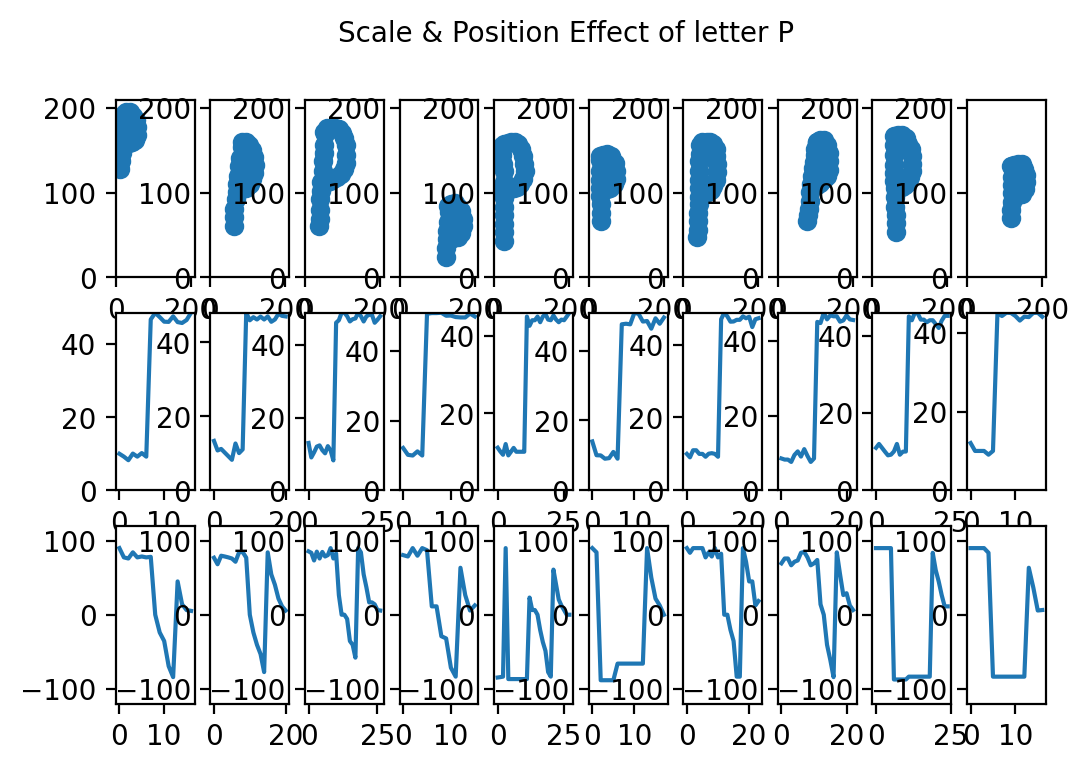

In [9]:
featurevisual(data_features1, data_labels1, data_sampchar1, chars=[3])

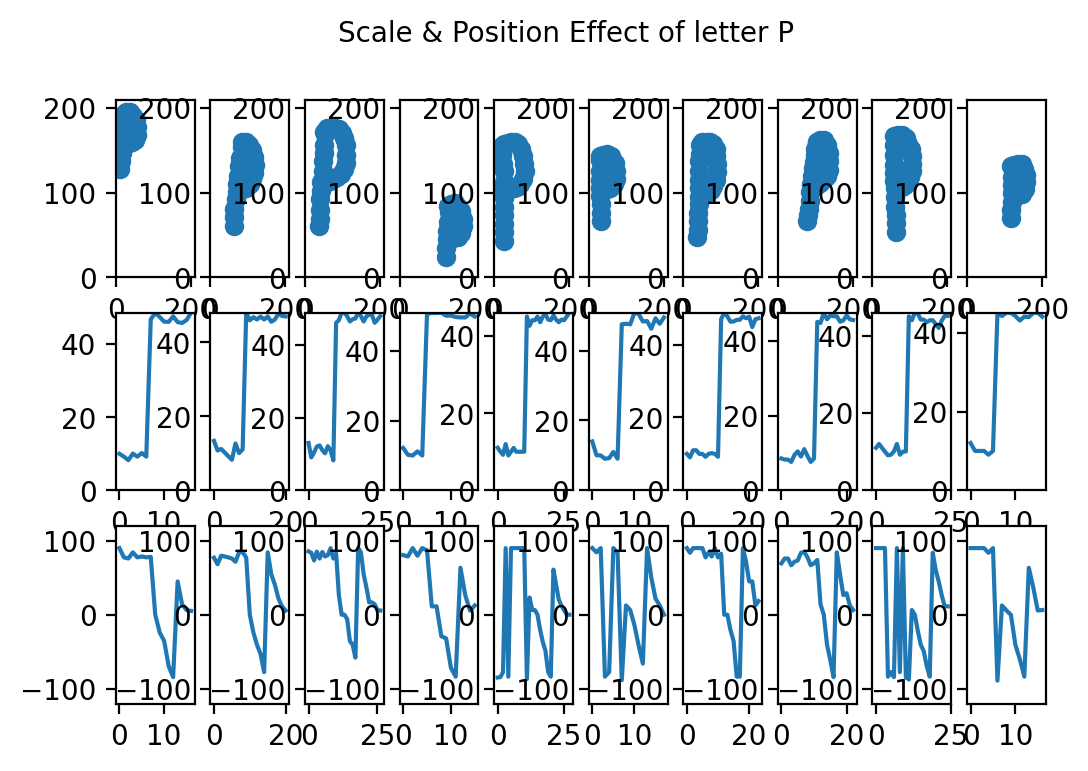

In [11]:
featurevisual(data_features2, data_labels2, data_sampchar2, chars=[3])

In [6]:
for char in range(len(data_labels)):

    #char = 5 # which character in the label list we are using
    obs = data_features[char]
    raw_obs = data[char]
    sampchar = data_sampchar[char]

    plt_num = len(data_features)  # number of samples plotted
    f, axarr = plt.subplots(3, plt_num, dpi = 200)
    f.suptitle('Scale & Position Effect of letter '+data_labels[char], fontsize=10)

    for i in range(plt_num):

        feature_symbol1 = obs[i]
        sampled_symbol1 = sampchar[i]

        # normalized distance ,slope, and t for symbol-1
        f1_symbol1 = feature_symbol1[0]
        f2_symbol1 = feature_symbol1[1]
        t1 = np.array(range(0,feature_symbol1.shape[1]))

        # mean and number of states required:
        # killgissa?

        #------------- SYMBOL DRAWINGS
        #Drawing of sampled symbol-1
        axarr[0, i].scatter(sampled_symbol1[0], sampled_symbol1[1])
        #axarr[0, i].set(xlabel = "X-Coordinate", ylabel = "Y-Coordinate")
        #axarr[0, i].set_title('Symbol-1')
        axarr[0, i].set_xlim([0,210])
        axarr[0, i].set_ylim([0,210])

        #------------- ABSOLUTE DISTANCE FEATURE
        #Absolute distance plot of symbol-1
        axarr[1, i].plot(t1, f1_symbol1)
        #axarr[1, i].set(xlabel = "Time", ylabel = "Normalized Distance")
        axarr[1, i].set_ylim([0,np.max(f1_symbol1)])

        #------------- SLOPE FEATURE
        #Y-wise distance plot of symbol-1
        axarr[2, i].plot(t1, f2_symbol1)
        #axarr[2, i].set(xlabel = "Time", ylabel = "Slope(Degrees)")
        axarr[2, i].set_ylim([-120,120])

    plt.show()

    """ Observed results:
    X: 2 states, 
    f1s1mean=10
    f1s2mean=45
    f2s1mean=-60
    f2s2mean=70
    """

NameError: name 'data_labels' is not defined